# C.V Assignment 2

## I have choosen an image from the Bing Image Genrator to do the 1st and 2nd questions of the assignment.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Loading the image and converting it to grayscale

image_path = "/Users/agastya/Downloads/image.jpeg"
image = Image.open(image_path).convert('RGB')
image_gray = image.convert('L')
image_array = np.array(image_gray)

In [2]:
image_array,image_array.shape

(array([[252, 252, 252, ..., 252, 251, 250],
        [253, 253, 253, ..., 253, 252, 251],
        [253, 253, 253, ..., 253, 253, 252],
        ...,
        [252, 253, 254, ..., 254, 254, 254],
        [251, 251, 250, ..., 253, 252, 250],
        [254, 254, 253, ..., 254, 254, 251]], dtype=uint8),
 (1024, 1024))

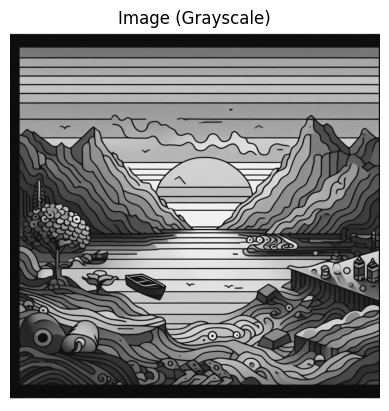

In [3]:
# Display the grayscale image
plt.imshow(image_array, cmap='gray')
plt.title('Image (Grayscale)')
plt.axis('off')
plt.show()

## Question 1

In [4]:
# Convert image_array to a data type that can handle negative numbers
image_array = image_array.astype('int16')

# Creating the gradient images with zeros an empty array,we will fill it with the values we get

rows, cols = image_array.shape
forward_gradient_x = np.zeros_like(image_array, dtype='int16')
forward_gradient_y = np.zeros_like(image_array, dtype='int16')


# Code to compute the forward gradient and inserts the value in the new arrays
for i in range(rows):
    for j in range(cols - 1):
        forward_gradient_x[i, j] = image_array[i, j + 1] - image_array[i, j]
for i in range(rows - 1):
    for j in range(cols):
        forward_gradient_y[i, j] = image_array[i + 1, j] - image_array[i, j]

In [5]:
forward_gradient_x,forward_gradient_x.shape

(array([[ 0,  0,  0, ..., -1, -1,  0],
        [ 0,  0,  0, ..., -1, -1,  0],
        [ 0,  0,  0, ...,  0, -1,  0],
        ...,
        [ 1,  1,  1, ...,  0,  0,  0],
        [ 0, -1,  0, ..., -1, -2,  0],
        [ 0, -1,  0, ...,  0, -3,  0]], dtype=int16),
 (1024, 1024))

In [6]:
forward_gradient_y,forward_gradient_y.shape

(array([[ 1,  1,  1, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  0,  1,  1],
        [ 0,  0,  0, ...,  1,  0,  1],
        ...,
        [-1, -2, -4, ..., -1, -2, -4],
        [ 3,  3,  3, ...,  1,  2,  1],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16),
 (1024, 1024))

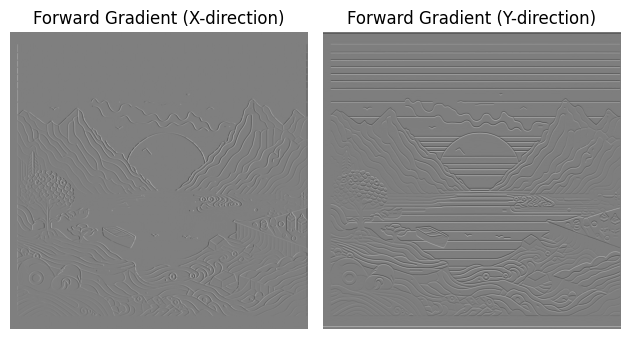

In [7]:
# Display Forward Gradient images
plt.subplot(1, 2, 1)
plt.imshow(forward_gradient_x, cmap='gray')
plt.title('Forward Gradient (X-direction)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(forward_gradient_y, cmap='gray')
plt.title('Forward Gradient (Y-direction)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
#  Creating the gradient images with zeros an empty array,we will fill it with the values we get
backward_gradient_x = np.zeros_like(image_array, dtype='int16')
backward_gradient_y = np.zeros_like(image_array, dtype='int16')

# Code to compute the backward gradient and inserts the value in the new arrays
for i in range(rows):
    for j in range(1, cols):
        backward_gradient_x[i, j] = image_array[i, j] - image_array[i, j - 1]
for i in range(1, rows):
    for j in range(cols):
        backward_gradient_y[i, j] = image_array[i, j] - image_array[i - 1, j]


In [9]:
backward_gradient_x

array([[ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1,  0, -1],
       ...,
       [ 0,  1,  1, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0, -1, -2],
       [ 0,  0, -1, ...,  0,  0, -3]], dtype=int16)

In [10]:
backward_gradient_y

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  0,  1,  1],
       ...,
       [ 3,  2,  1, ...,  1,  0, -1],
       [-1, -2, -4, ..., -1, -2, -4],
       [ 3,  3,  3, ...,  1,  2,  1]], dtype=int16)

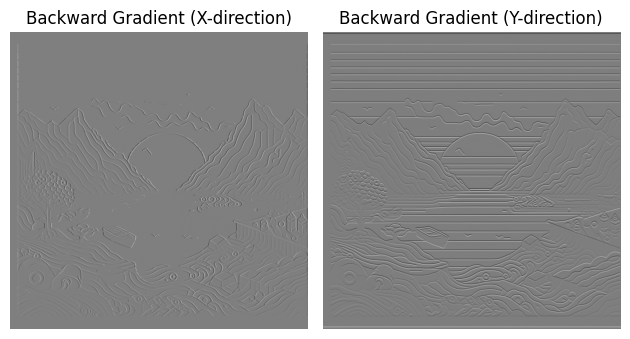

In [11]:
# Display Backward Gradient images
plt.subplot(1, 2, 1)
plt.imshow(backward_gradient_x, cmap='gray')
plt.title('Backward Gradient (X-direction)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(backward_gradient_y, cmap='gray')
plt.title('Backward Gradient (Y-direction)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
#  Creating the gradient images with zeros an empty array,we will fill it with the values we get
central_gradient_x = np.zeros_like(image_array, dtype='int16')
central_gradient_y = np.zeros_like(image_array, dtype='int16')

# Code to compute the central gradient and inserts the value in the new arrays
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        central_gradient_x[i, j] = (image_array[i, j + 1] - image_array[i, j - 1]) // 2
        central_gradient_y[i, j] = (image_array[i + 1, j] - image_array[i - 1, j]) // 2

In [13]:
central_gradient_x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., -1, -1,  0],
       [ 0,  0,  0, ..., -1, -1,  0],
       ...,
       [ 0,  1,  1, ...,  0,  0,  0],
       [ 0, -1, -1, ..., -1, -2,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

In [14]:
central_gradient_y

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0, -2, ...,  0, -1,  0],
       [ 0,  0, -1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int16)

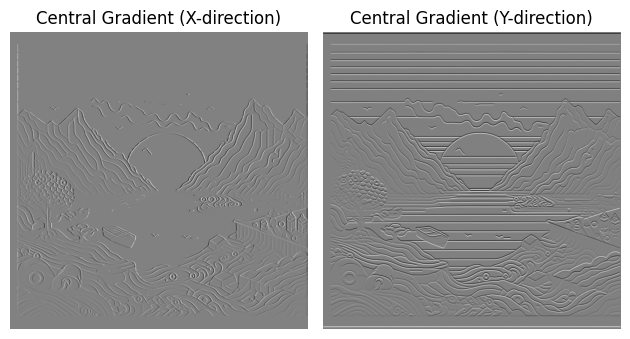

In [15]:
# Display Central Gradient images
plt.subplot(1, 2, 1)
plt.imshow(central_gradient_x, cmap='gray')
plt.title('Central Gradient (X-direction)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(central_gradient_y, cmap='gray')
plt.title('Central Gradient (Y-direction)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
a=np.sqrt(forward_gradient_x**2 + forward_gradient_y**2)

/var/folders/qc/cl66n0gn1cqgckzb18klf0zw0000gn/T/ipykernel_49284/1817482589.py:1: RuntimeWarning: invalid value encountered in sqrt
  a=np.sqrt(forward_gradient_x**2 + forward_gradient_y**2)


#### Here we are getting warning that is may be due to overflow in the data type being used. The int16 data type can handle values from -32,768 to 32,767. When you square the values, they can easily exceed this range.

#### To avoid this, we can convert the gradient arrays to a floating-point data type (like float32 or float64) before performing the squaring and square root operations. This will prevent overflow issues.

In [17]:
# Convert the gradients to float32 to prevent overflow
forward_gradient_x_float = forward_gradient_x.astype('float32')
forward_gradient_y_float = forward_gradient_y.astype('float32')

# Compute the gradient magnitude
gradient_magnitude_forward = np.sqrt(forward_gradient_x_float**2 + forward_gradient_y_float**2)

# Compute the gradient direction
gradient_direction_forward = np.arctan2(forward_gradient_y_float, forward_gradient_x_float) * 180 / np.pi

gradient_magnitude_forward, gradient_direction_forward


(array([[1.       , 1.       , 1.       , ..., 1.4142135, 1.4142135,
         1.       ],
        [0.       , 0.       , 0.       , ..., 1.       , 1.4142135,
         1.       ],
        [0.       , 0.       , 0.       , ..., 1.       , 1.       ,
         1.       ],
        ...,
        [1.4142135, 2.236068 , 4.1231055, ..., 1.       , 2.       ,
         4.       ],
        [3.       , 3.1622777, 3.       , ..., 1.4142135, 2.828427 ,
         1.       ],
        [0.       , 1.       , 0.       , ..., 0.       , 3.       ,
         0.       ]], dtype=float32),
 array([[ 90.      ,  90.      ,  90.      , ..., 135.      , 135.      ,
          90.      ],
        [  0.      ,   0.      ,   0.      , ..., 179.99998 , 135.      ,
          90.      ],
        [  0.      ,   0.      ,   0.      , ...,  90.      , 179.99998 ,
          90.      ],
        ...,
        [-45.      , -63.434948, -75.96376 , ..., -90.      , -90.      ,
         -90.      ],
        [ 90.      , 108.43495 , 

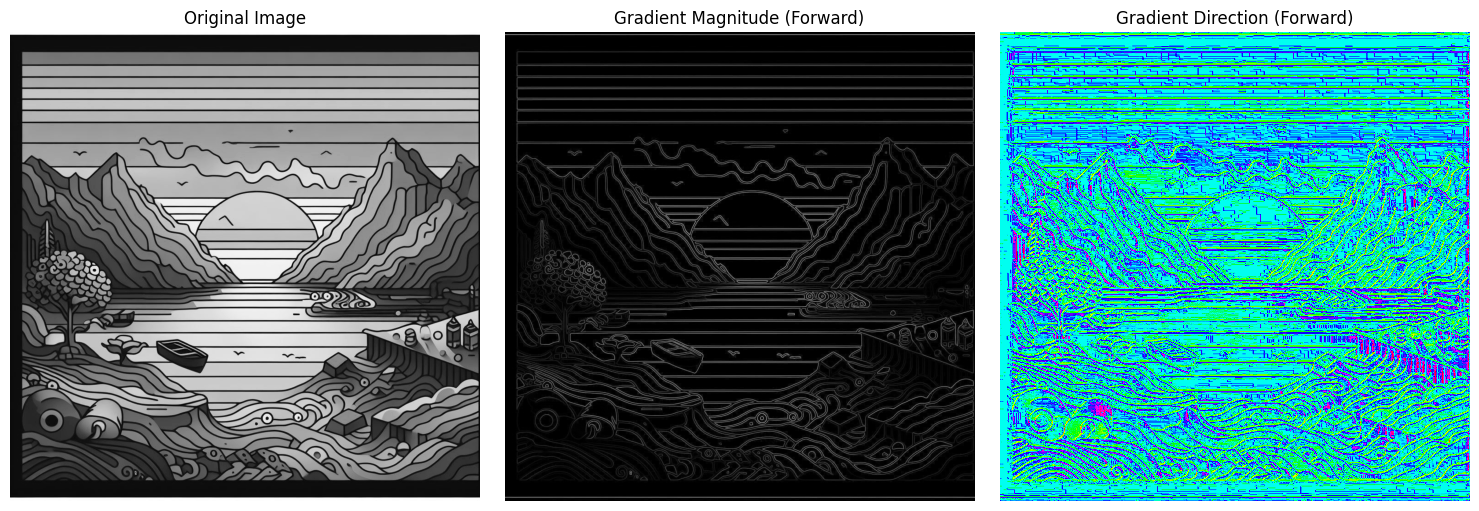

In [18]:
# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Gradient Magnitude (Forward)
ax[1].imshow(gradient_magnitude_forward, cmap='gray')
ax[1].set_title("Gradient Magnitude (Forward)")
ax[1].axis('off')

# Gradient Direction (Forward)
ax[2].imshow(gradient_direction_forward, cmap='hsv')
ax[2].set_title("Gradient Direction (Forward)")
ax[2].axis('off')

plt.tight_layout()
plt.show()


In [19]:
# Convert the gradients to float32 to prevent overflow
backward_gradient_x_float = backward_gradient_x.astype('float32')
backward_gradient_y_float = backward_gradient_y.astype('float32')

# Compute the gradient magnitude
gradient_magnitude_backward = np.sqrt(backward_gradient_x_float**2 + backward_gradient_y_float**2)

# Compute the gradient direction
gradient_direction_backward = np.arctan2(backward_gradient_y_float, backward_gradient_x_float) * 180 / np.pi

gradient_magnitude_backward, gradient_direction_forward


(array([[0.       , 0.       , 0.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 1.       , ..., 1.4142135, 1.4142135,
         1.4142135],
        [0.       , 0.       , 0.       , ..., 1.       , 1.       ,
         1.4142135],
        ...,
        [3.       , 2.236068 , 1.4142135, ..., 1.       , 0.       ,
         1.       ],
        [1.       , 2.       , 4.1231055, ..., 1.       , 2.236068 ,
         4.472136 ],
        [3.       , 3.       , 3.1622777, ..., 1.       , 2.       ,
         3.1622777]], dtype=float32),
 array([[ 90.      ,  90.      ,  90.      , ..., 135.      , 135.      ,
          90.      ],
        [  0.      ,   0.      ,   0.      , ..., 179.99998 , 135.      ,
          90.      ],
        [  0.      ,   0.      ,   0.      , ...,  90.      , 179.99998 ,
          90.      ],
        ...,
        [-45.      , -63.434948, -75.96376 , ..., -90.      , -90.      ,
         -90.      ],
        [ 90.      , 108.43495 , 

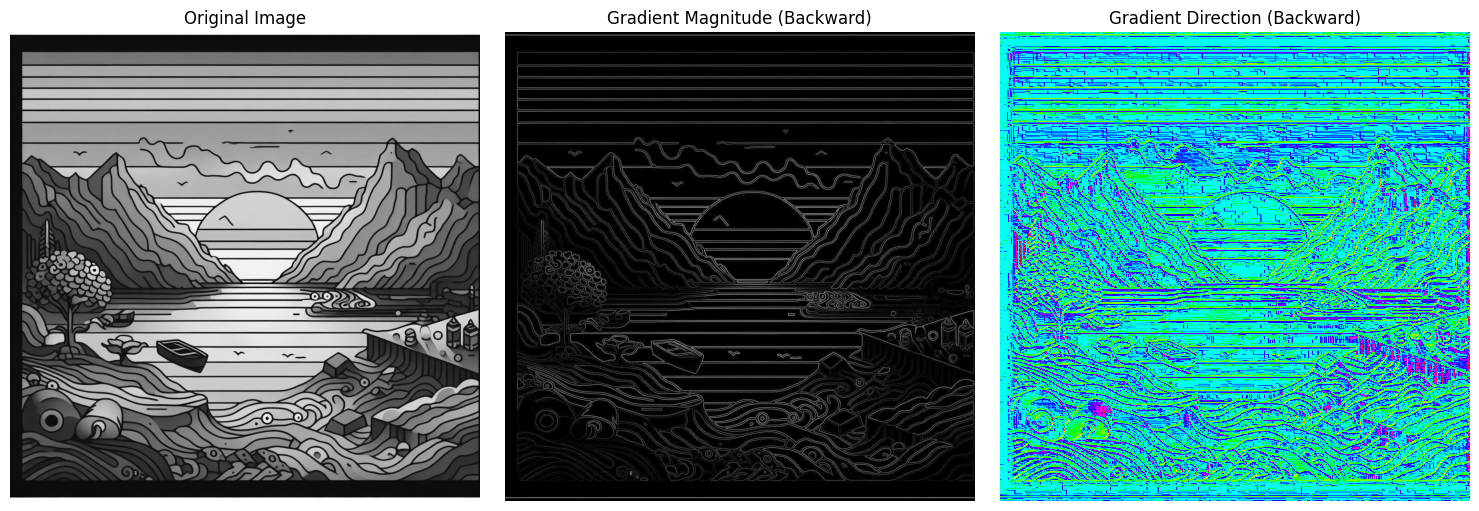

In [20]:
# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Gradient Magnitude (Forward)
ax[1].imshow(gradient_magnitude_backward, cmap='gray')
ax[1].set_title("Gradient Magnitude (Backward)")
ax[1].axis('off')

# Gradient Direction (Forward)
ax[2].imshow(gradient_direction_backward, cmap='hsv')
ax[2].set_title("Gradient Direction (Backward)")
ax[2].axis('off')

plt.tight_layout()
plt.show()


In [21]:
# Convert the gradients to float32 to prevent overflow
central_gradient_x_float = central_gradient_x.astype('float32')
central_gradient_y_float = central_gradient_y.astype('float32')

# Compute the gradient magnitude
gradient_magnitude_central = np.sqrt(central_gradient_x_float**2 + central_gradient_y_float**2)

# Compute the gradient direction
gradient_direction_central = np.arctan2(central_gradient_y_float, central_gradient_x_float) * 180 / np.pi

gradient_magnitude_central, gradient_direction_central


(array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 1.       , 1.4142135,
         0.       ],
        [0.       , 0.       , 0.       , ..., 1.       , 1.       ,
         0.       ],
        ...,
        [0.       , 1.       , 2.236068 , ..., 0.       , 1.       ,
         0.       ],
        [0.       , 1.       , 1.4142135, ..., 1.       , 2.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 array([[   0.      ,    0.      ,    0.      , ...,    0.      ,
            0.      ,    0.      ],
        [   0.      ,    0.      ,    0.      , ...,  179.99998 ,
          135.      ,    0.      ],
        [   0.      ,    0.      ,    0.      , ...,  179.99998 ,
          179.99998 ,    0.      ],
        ...,
        [   0.      ,    0.      ,  -63.434948, ...,    0.      ,
          -90.      ,    0.      ],
        [

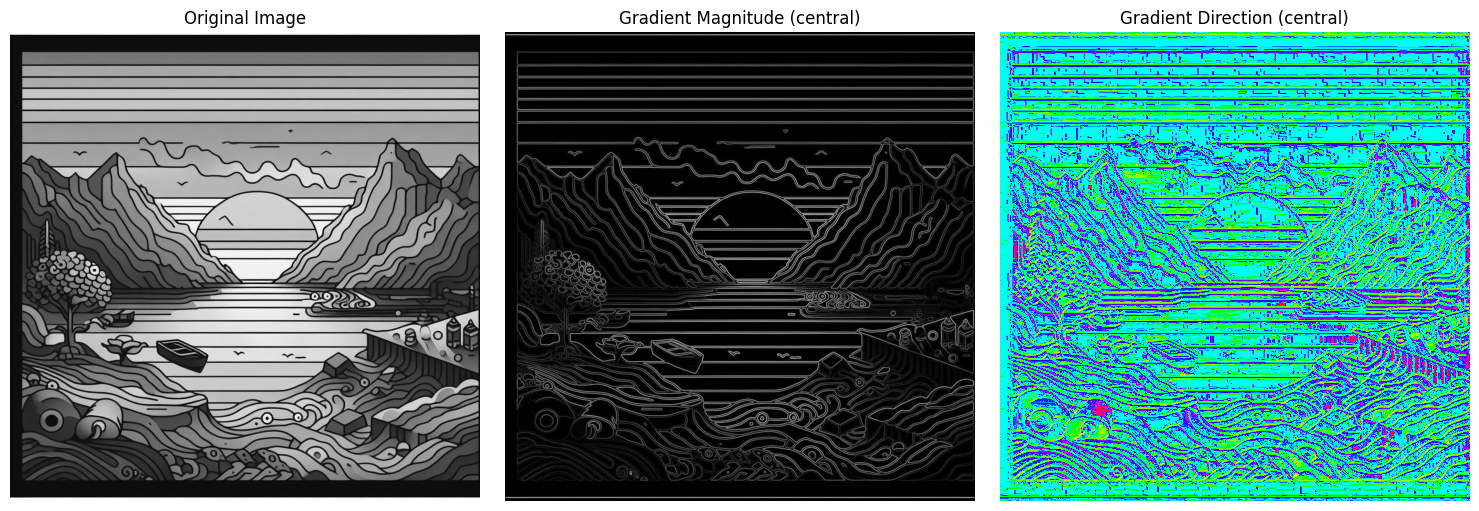

In [22]:
# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Gradient Magnitude (Forward)
ax[1].imshow(gradient_magnitude_central, cmap='gray')
ax[1].set_title("Gradient Magnitude (central)")
ax[1].axis('off')

# Gradient Direction (Forward)
ax[2].imshow(gradient_direction_central, cmap='hsv')
ax[2].set_title("Gradient Direction (central)")
ax[2].axis('off')

plt.tight_layout()
plt.show()


## Question 2

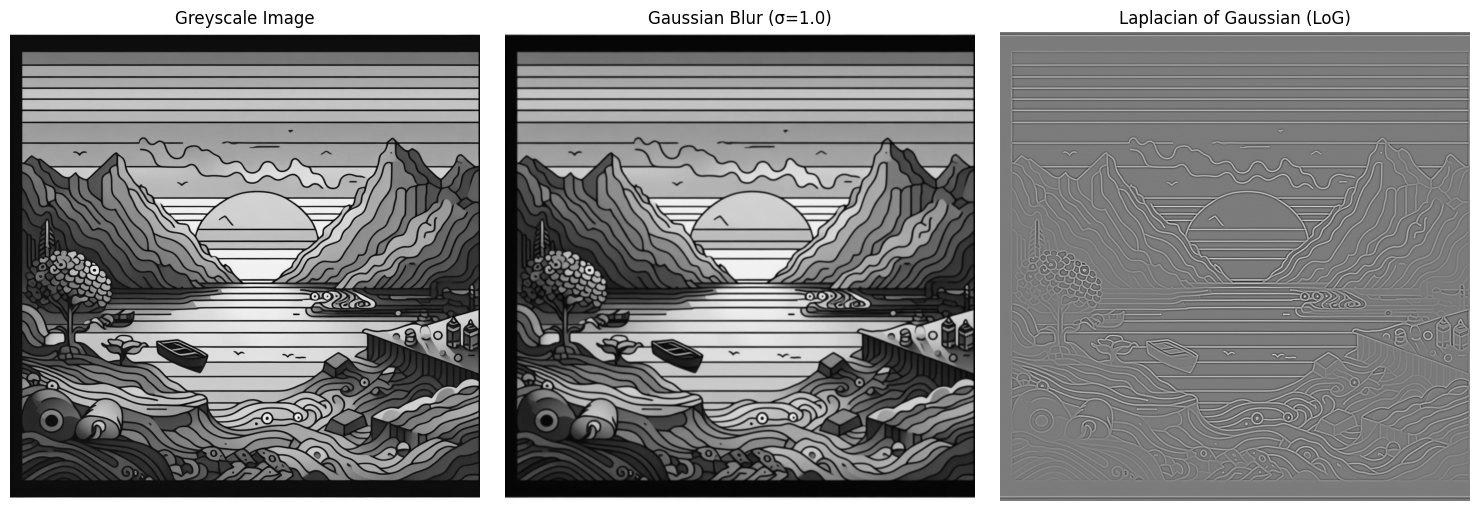

In [36]:
import cv2

# Gaussian smoothing
sigma = 1.0
gaussian_blur = cv2.GaussianBlur(image_array, (0, 0), sigma)

# Laplacian filtering
laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image_array, cmap='gray')
ax[0].set_title('Greyscale Image')
ax[0].axis('off')

ax[1].imshow(gaussian_blur, cmap='gray')
ax[1].set_title(f'Gaussian Blur (σ={sigma})')
ax[1].axis('off')

ax[2].imshow(laplacian, cmap='gray')
ax[2].set_title('Laplacian of Gaussian (LoG)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


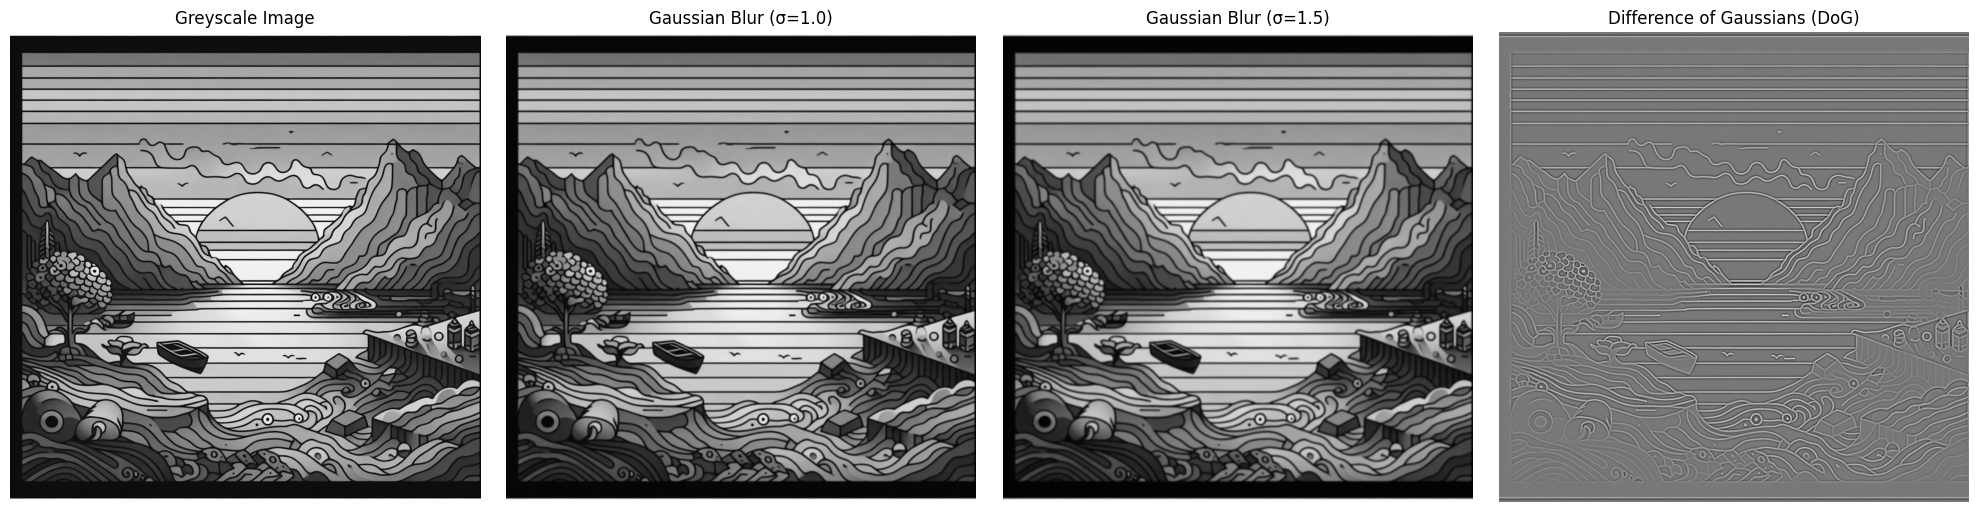

In [24]:
# Define two different sigmas
sigma1 = 1.0
sigma2 = 1.5

# Apply Gaussian blurring with the two sigmas
gaussian_blur1 = cv2.GaussianBlur(image_array, (0, 0), sigma1)
gaussian_blur2 = cv2.GaussianBlur(image_array, (0, 0), sigma2)

# Compute the DoG
dog = gaussian_blur2 - gaussian_blur1

# Display the results
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image_array, cmap='gray')
ax[0].set_title('Greyscale Image')
ax[0].axis('off')

ax[1].imshow(gaussian_blur1, cmap='gray')
ax[1].set_title(f'Gaussian Blur (σ={sigma1})')
ax[1].axis('off')

ax[2].imshow(gaussian_blur2, cmap='gray')
ax[2].set_title(f'Gaussian Blur (σ={sigma2})')
ax[2].axis('off')

ax[3].imshow(dog, cmap='gray')
ax[3].set_title('Difference of Gaussians (DoG)')
ax[3].axis('off')

plt.tight_layout()
plt.show()


In [25]:
def generate_gaussian_filter(size, sigma):
     
    
    # Initialize the kernel with zeros
    kernel = np.zeros((size, size))
    
    # Calculate the center of the kernel
    center = size // 2
    
    # Populate the kernel with values from the Gaussian function
    for i in range(size):
        for j in range(size):
            x = i - center
            y = j - center
            kernel[i, j] = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2) / (2*sigma**2))
    
    # Normalize the kernel
    kernel /= kernel.sum()
    
    return kernel
def pad_image(image, pad_size):
    return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

def convolve2D(image, kernel):
    m, n = kernel.shape
    pad_size = m // 2  # Assuming kernel is always odd-sized
    padded_image = pad_image(image, pad_size)
    
    y, x = padded_image.shape
    y = y - m + 1
    x = x - n + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(padded_image[i:i+m, j:j+n] * kernel)
    return new_image

def downsample(image):
    """Downsample an image by half."""
    return image[::2, ::2]

def gaussian_pyramid(image, num_levels, sigma):
    """Construct a Gaussian pyramid using custom functions."""
    pyramid = [image]
    
    for i in range(num_levels - 1):
        # Create a Gaussian filter
        gaussian_filter = generate_gaussian_filter(5, sigma)
        
        # Convolve the image using the Gaussian filter
        smoothed_image = convolve2D(pyramid[-1], gaussian_filter)
        
        # Downsample the smoothed image
        reduced_image = downsample(smoothed_image)
        
        # Append the reduced image to the pyramid
        pyramid.append(reduced_image)
    
    return pyramid

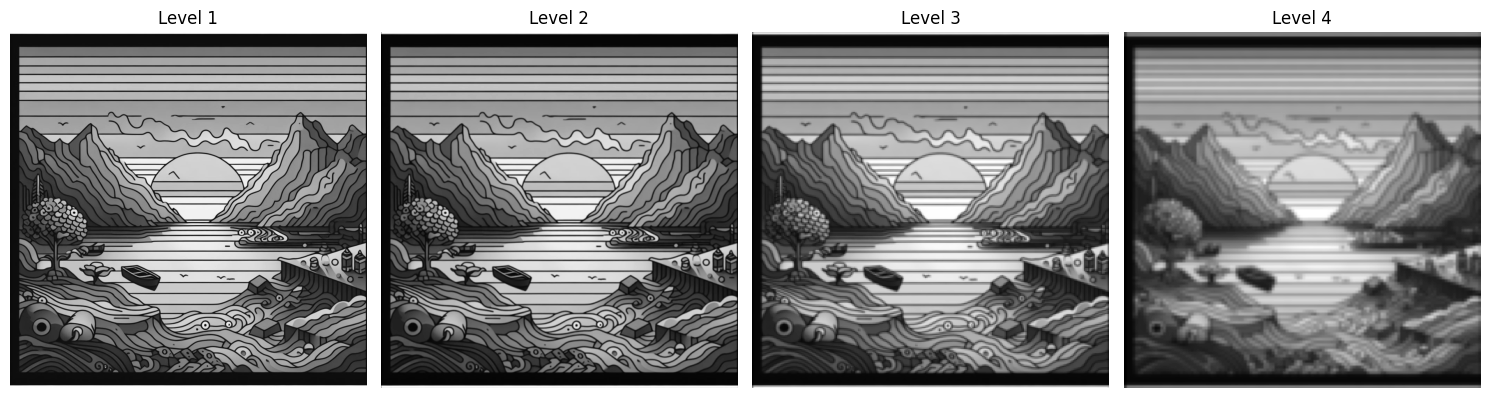

In [26]:
num_levels = 4
# Construct the Gaussian pyramid using custom functions
pyramid_custom = gaussian_pyramid(image_array,num_levels, 1)

# Display the pyramid
fig, ax = plt.subplots(1, num_levels, figsize=(15, 5))
for i in range(num_levels):
    ax[i].imshow(pyramid_custom[i], cmap='gray')
    ax[i].set_title(f'Level {i + 1}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()


In [27]:
for i in range (num_levels):
    print(pyramid_custom[i].shape)

(1024, 1024)
(512, 512)
(256, 256)
(128, 128)


## Question 3

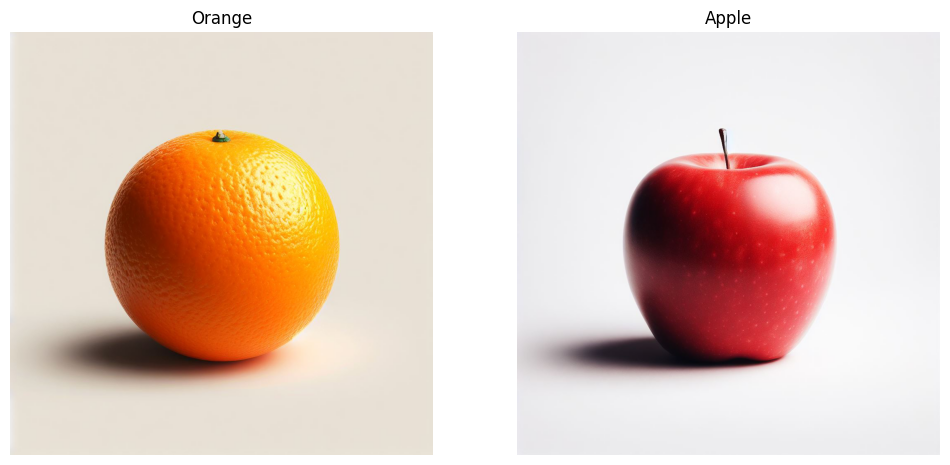

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the uploaded images
orange_image_path = "/Users/agastya/Downloads/org.jpeg"
apple_image_path = "/Users/agastya/Downloads/apl.jpeg"

# Open the images
orange_image = Image.open(orange_image_path).convert('RGB')
apple_image = Image.open(apple_image_path).convert('RGB')

# Display the original images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(orange_image)
ax[0].set_title('Orange')
ax[0].axis('off')

ax[1].imshow(apple_image)
ax[1].set_title('Apple')
ax[1].axis('off')

plt.show()


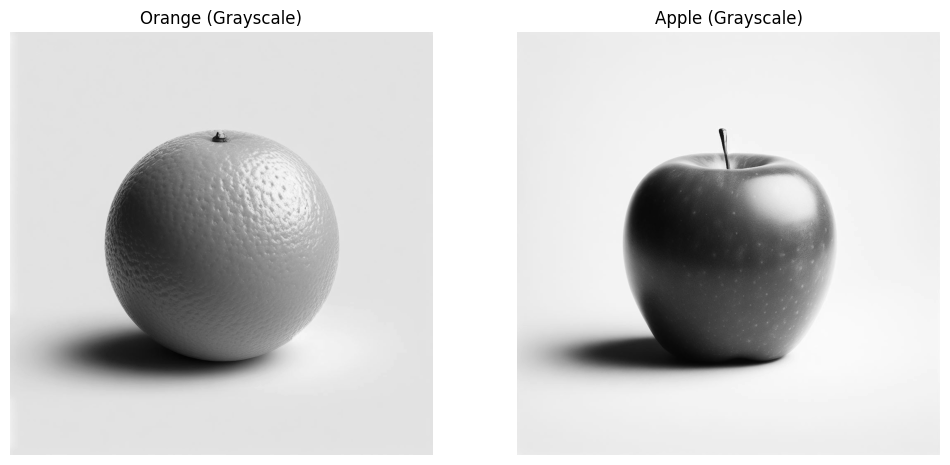

((1024, 1024), (1024, 1024))

In [29]:
import numpy as np

# Convert the images to grayscale
orange_gray = orange_image.convert('L')
apple_gray = apple_image.convert('L')

# Convert to NumPy arrays for computation
orange_array = np.array(orange_gray)
apple_array = np.array(apple_gray)

# Display the grayscale images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(orange_array, cmap='gray')
ax[0].set_title('Orange (Grayscale)')
ax[0].axis('off')

ax[1].imshow(apple_array, cmap='gray')
ax[1].set_title('Apple (Grayscale)')
ax[1].axis('off')

plt.show()

# Check the shape of the numpy arrays
orange_array.shape, apple_array.shape

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# Nearest neighbor upsample
def upsample2x(image):
    return image.repeat(2, axis=0).repeat(2, axis=1)

# Laplacian Pyramid
def laplacian_pyramid(gaussian_pyramid):
    laplacian_pyramid = []
    for i in range(len(gaussian_pyramid) - 1):
        upsampled = upsample2x(gaussian_pyramid[i + 1])
        if upsampled.shape != gaussian_pyramid[i].shape:
            upsampled = upsampled[:gaussian_pyramid[i].shape[0], :gaussian_pyramid[i].shape[1]]
        laplacian = gaussian_pyramid[i] - upsampled
        laplacian_pyramid.append(laplacian)
    laplacian_pyramid.append(gaussian_pyramid[-1])
    return laplacian_pyramid
 

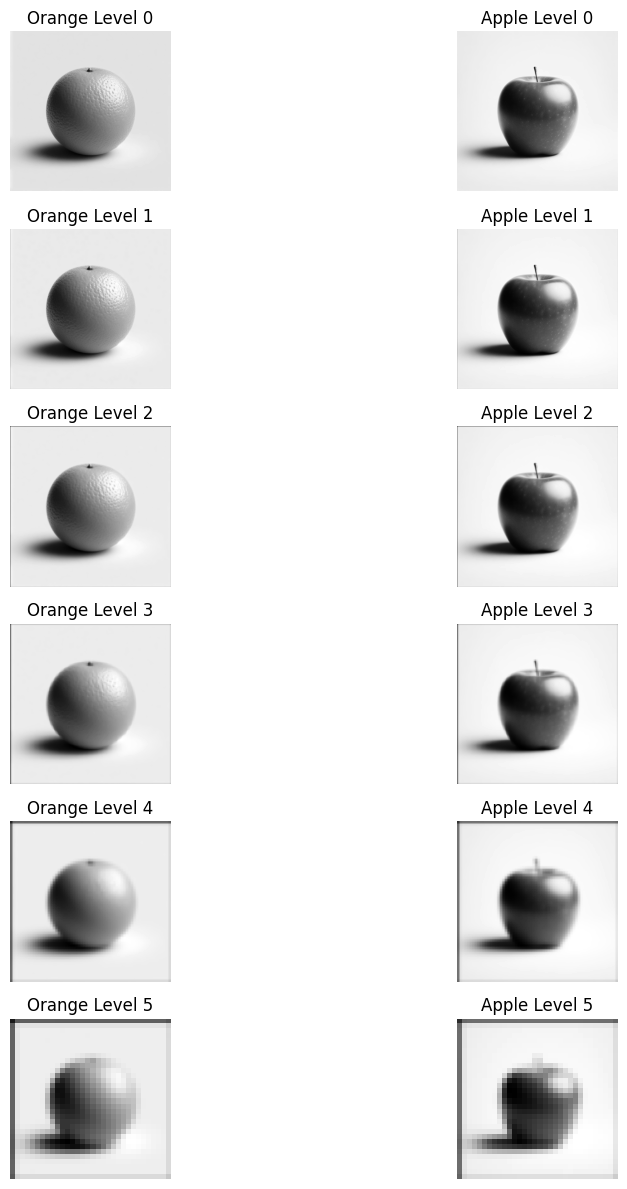

In [31]:
levels=6
# Generate the Gaussian Pyramid for Orange and Apple images again
orange_pyramid = gaussian_pyramid(orange_array, levels, sigma=1.0)
apple_pyramid = gaussian_pyramid(apple_array, levels, sigma=1.0)

# Display the Gaussian Pyramids
fig, ax = plt.subplots(levels, 2, figsize=(12, 12))

for i in range(levels):
    ax[i, 0].imshow(orange_pyramid[i], cmap='gray')
    ax[i, 0].set_title(f'Orange Level {i}')
    ax[i, 0].axis('off')

    ax[i, 1].imshow(apple_pyramid[i], cmap='gray')
    ax[i, 1].set_title(f'Apple Level {i}')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()

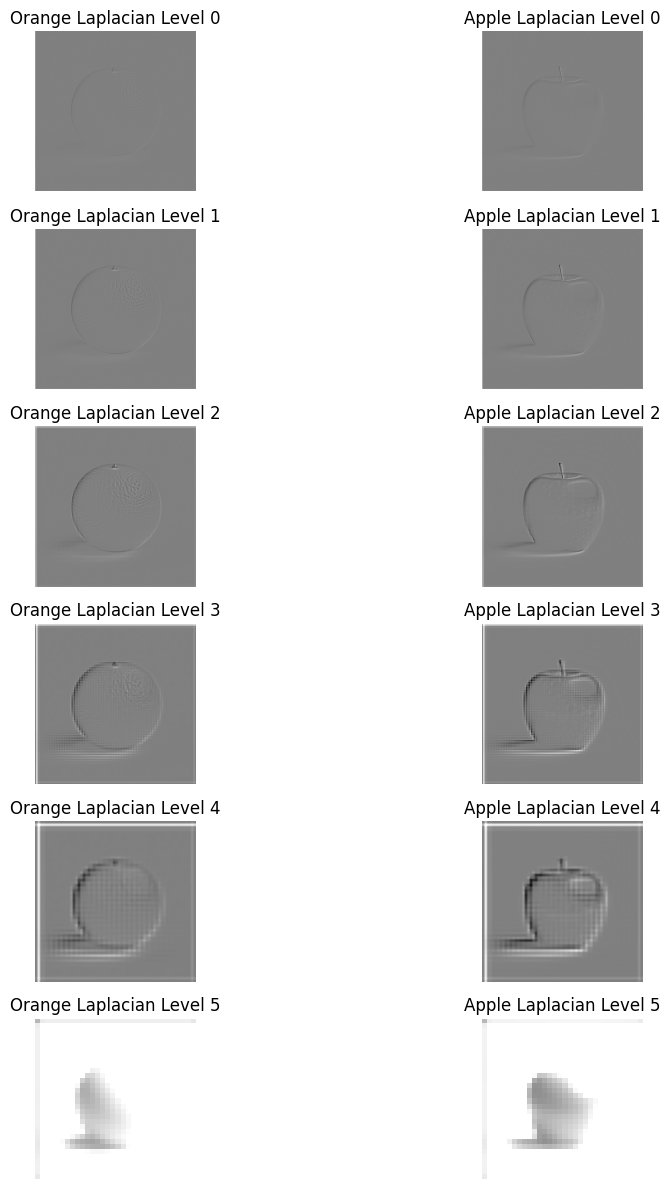

In [32]:
# Generate the Laplacian Pyramid for Orange and Apple images
orange_laplacian_pyramid = laplacian_pyramid(orange_pyramid)
apple_laplacian_pyramid = laplacian_pyramid(apple_pyramid)

# Display the Laplacian Pyramids
fig, ax = plt.subplots(levels, 2, figsize=(12, 12))

for i in range(levels):
    ax[i, 0].imshow(orange_laplacian_pyramid[i], cmap='gray', vmin=-128, vmax=128)
    ax[i, 0].set_title(f'Orange Laplacian Level {i}')
    ax[i, 0].axis('off')

    ax[i, 1].imshow(apple_laplacian_pyramid[i], cmap='gray', vmin=-128, vmax=128)
    ax[i, 1].set_title(f'Apple Laplacian Level {i}')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()

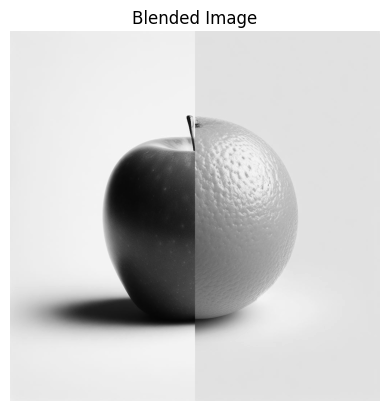

In [37]:
# Function to blend two Laplacian pyramids
def blend_laplacian_pyramids(laplacian1, laplacian2):
    blended_pyramid = []
    for i in range(len(laplacian1)):
        # Take the left half from the apple image and the right half from the orange image
        rows, cols = laplacian1[i].shape
        blended = np.hstack((laplacian1[i][:, :cols//2], laplacian2[i][:, cols//2:]))
        blended_pyramid.append(blended)
    return blended_pyramid
# Function to reconstruct an image from a Laplacian pyramid
def reconstruct_from_laplacian(laplacian_pyramid):
    reconstructed_image = laplacian_pyramid[-1]  # Start with the smallest image
    for i in range(len(laplacian_pyramid) - 2, -1, -1):
        # Upsample and add to the next level
        upsampled = upsample2x(reconstructed_image)
        if upsampled.shape != laplacian_pyramid[i].shape:
            upsampled = upsampled[:laplacian_pyramid[i].shape[0], :laplacian_pyramid[i].shape[1]]
        reconstructed_image = upsampled + laplacian_pyramid[i]
    return reconstructed_image
# Blend the Laplacian pyramids
blended_pyramid = blend_laplacian_pyramids(apple_laplacian_pyramid, orange_laplacian_pyramid)

# Reconstruct the final blended image
blended_image = reconstruct_from_laplacian(blended_pyramid)

# Display the blended image
plt.imshow(blended_image, cmap='gray')
plt.title('Blended Image')
plt.axis('off')
plt.show()
